# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

Following the initial publication of the book in 2011, Erica Chenoweth continued her research on the topic and published a follow-up ten years later, [Civil Resistance: What Everyone Needs to Know](https://www.ericachenoweth.com/research/civil-resistance-what-everyone-needs-to-know). She has also continued to update the data used for her research.

The research became famous for propising the 3.5% rule: "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event"; you can find a nice overview at [Questions, Answers, and Some Cautionary
Updates Regarding the 3.5% Rule](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf). Among other things, you will investigate that rule.

Το conduct the analysis, we use the following data: the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). We will also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), in particular the Polity5 version, available from [Integrated Network for Societal Conflict Research (INSCR) ](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls).



> Ioannis Kalantzis <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8200235@aueb.gr

## Extracting the Data

* Let's import `pandas` for this case. 
* For the first requirements of the analysis we will use the data from the 'NAVCO 1.2 Updated.tab' file.

In [1]:
import pandas as pd
campaigns = pd.read_csv('data/NAVCO 1.2 Updated.tab', sep='\t')
campaigns

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We observe many rows with NaN values and we will delete them from our DataFrame.

In [2]:
campaigns = campaigns.dropna(how='all')
campaigns

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,249.0,Zambian independence movement,Zambia,1961.0,1963.0,British rule,1.0,0.0,0.0,0.0,...,0.0,913.0,1000000.0,0.285063,0.0,1.0,0.0,0.0,0.0,0.0
385,248.0,Zambia anti-single party rule,Zambia,1990.0,1991.0,One-party rule,1.0,0.0,0.0,0.0,...,0.0,488.0,23000.0,0.002791,1.0,0.0,0.0,1.0,0.0,0.0
386,12.0,anti-Chiluba campaign,Zambia,2001.0,2001.0,Chiluba regime,1.0,0.0,0.0,0.0,...,0.0,213.0,3000.0,0.000277,0.0,0.0,0.0,0.0,0.0,0.0
387,250.0,Zimbabwe African People's Union,Zimbabwe,1972.0,1979.0,Smith/Muzorena regime,0.0,1.0,0.0,0.0,...,0.0,2556.0,1000.0,0.000145,1.0,0.0,NaN,0.0,1.0,0.0


* Much better! Now, we can start working on the essential requisites of the analysis.

## 1. Exploration of Historical Trends

* First, to create the following diagrams we will import `matplotlib.pyplot`.

In [3]:
import matplotlib.pyplot as plt

* We first create a copy of our DataFrame to ensure that no `SettingWithCopyWarning` is occured.
* Then, based on the peak year of each campaign, we will match the year to the corresponding decade.
* The new column DECADE will be usefull for the next diagrams as well.

In [4]:
campaigns = campaigns.copy()
campaigns['EYEAR'] = pd.to_datetime(campaigns['EYEAR'], format='%Y')
campaigns['DECADE'] = (campaigns['EYEAR'].dt.year // 10) * 10
campaigns['DECADE']

0      1970
1      1980
2      1990
3      2010
4      1990
       ... 
384    1960
385    1990
386    2000
387    1970
388    1980
Name: DECADE, Length: 389, dtype: int32

* Now we will group by based on the decade and the violence status of each campaign, to separate the violent and the non violent campaigns. 

In [5]:
campaigns_satus = campaigns.groupby(['DECADE', 'VIOL']).size().unstack().fillna(0)
campaigns_satus

VIOL,0.0,1.0
DECADE,,
1940,2,12
1950,9,25
1960,8,21
1970,13,27
1980,30,17
1990,36,54
2000,37,23
2010,34,41


* Now, using a stack plot we will display the violent and non violent campaings based on end year.

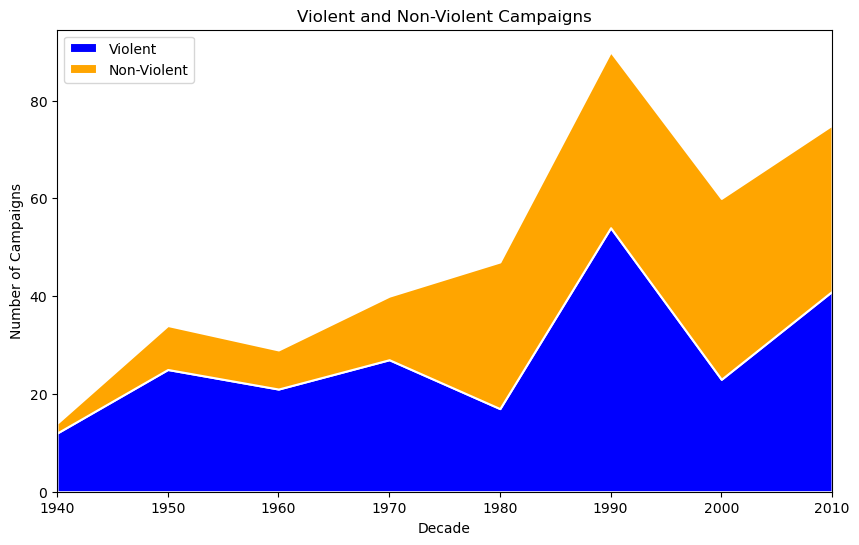

In [6]:
# Create plot.
plt.figure(figsize=(10, 6))
plt.stackplot(campaigns_satus.index, campaigns_satus[1], campaigns_satus[0], labels=['Violent', 'Non-Violent'], colors=['blue', 'orange'], edgecolor=['white'], linewidth=1.5)

# Add labels and title.
plt.xlabel('Decade')
plt.ylabel('Number of Campaigns')
plt.title('Violent and Non-Violent Campaigns')
plt.legend(loc='upper left')

# Set x-axis' limits.
plt.xlim(campaigns['DECADE'].min(), campaigns['DECADE'].max())
plt.show()

* Now, we will create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success.
* First, we are going to group by based on the decade and then calculate the percentage of success for nonviolent campaigns.

In [7]:
success_percentage = campaigns[campaigns['VIOL'] == 0].groupby('DECADE')['SUCCESS'].mean()
success_percentage

DECADE
1940    0.500000
1950    0.222222
1960    0.250000
1970    0.538462
1980    0.466667
1990    0.833333
2000    0.675676
2010    0.382353
Name: SUCCESS, dtype: float64

* Lets, create the plot with two vertical axes.

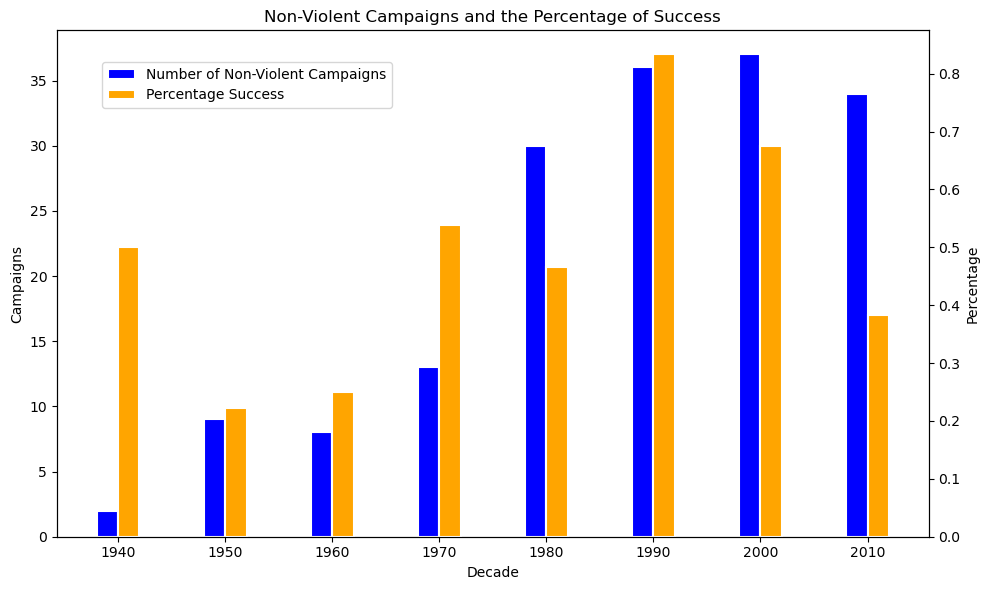

In [8]:
# Create a plot with two vertical axes.
fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 2.0

# Plot the number of Νon-Violent campaigns on the first axis.
ax1.bar(campaigns_satus.index - bar_width/2, campaigns_satus[0], width=bar_width, color='blue', label='Number of Non-Violent Campaigns',  edgecolor=['white'], linewidth=1.5)
ax1.set_xlabel('Decade')
ax1.set_ylabel('Campaigns')
ax1.tick_params('y')

# Create a secondary y-axis for the percentage of success.
ax2 = ax1.twinx()
ax2.bar(success_percentage.index + bar_width/2, success_percentage, width=bar_width, color='orange', label='Percentage Success', edgecolor=['white'], linewidth=1.5)
ax2.set_ylabel('Percentage')
ax2.tick_params('y')

# Add the title.
plt.title('Non-Violent Campaigns and the Percentage of Success')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

* Finally, let's create a plot showing the success rate for violent and nonviolent campaigns by decade.
* As the one above, it will be a plot with two vertical axes.
* But, once again, we have to group by the decade and the status of the campaign and then calculate the success rate *for each* category.

In [9]:
success_rate = campaigns.groupby(['DECADE', 'VIOL'])['SUCCESS'].mean().unstack()
success_rate

VIOL,0.0,1.0
DECADE,,
1940,0.500000,0.500000
1950,0.222222,0.320000
1960,0.250000,0.190476
1970,0.538462,0.444444
1980,0.466667,0.294118
1990,0.833333,0.277778
2000,0.675676,0.130435
2010,0.382353,0.073171


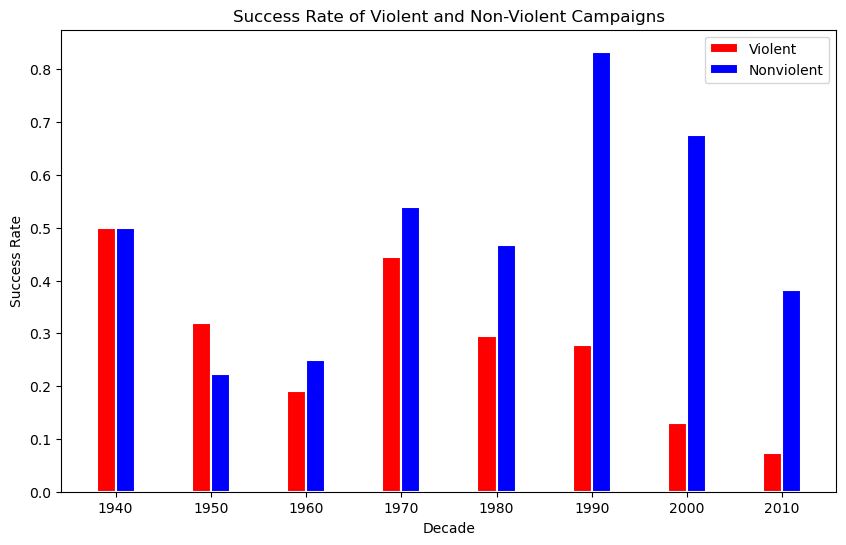

In [10]:
# Create a plot with bars side by side.
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 2

# Plot the bars.
ax.bar(success_rate.index - bar_width/2, success_rate[1], width=bar_width, color='red', label='Violent', edgecolor=['white'], linewidth=1.5)
ax.bar(success_rate.index + bar_width/2, success_rate[0], width=bar_width, color='blue', label='Nonviolent', edgecolor=['white'], linewidth=1.5)

# Customize the plot.
ax.set_xlabel('Decade')
ax.set_ylabel('Success Rate')
ax.set_title('Success Rate of Violent and Non-Violent Campaigns')
ax.legend()
plt.show()

## 2. Largest Resistance Campaigns, 1946-2014

* Now, we have to create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%.
* To begin with, let's find the campaigns with percentage of participation at least 2.0% and sort them in ascending order.

In [11]:
filtered_campaigns = campaigns[campaigns['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02]
filtered_campaigns = filtered_campaigns.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=True)
filtered_campaigns.sample(5)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,DECADE
339,310.0,Pro-Democracy Protests,Tonga,2005.0,2006-01-01,Government,0.0,1.0,0.0,0.0,...,540.0,3000.0,0.029502,1.0,0.0,0.0,0.0,1.0,0.0,2000
104,202.0,Singing Revolution,Estonia,1987.0,1991-01-01,Communist regime,1.0,0.0,0.0,0.0,...,1459.0,300000.0,0.192146,1.0,0.0,0.0,0.0,1.0,0.0,1990
89,74.0,East German uprising,East Germany,1953.0,1953-01-01,Communist regime,0.0,0.0,1.0,0.0,...,17.0,400000.0,0.022005,1.0,0.0,0.0,0.0,1.0,0.0,1950
80,240.0,Velvet Revolution,Czechoslovakia,1989.0,1989-01-01,Communist regime,1.0,0.0,0.0,0.0,...,24.0,500000.0,0.048544,1.0,0.0,0.0,0.0,1.0,0.0,1980
63,26.0,anti-Pinochet campaign,Chile,1983.0,1989-01-01,Augusto Pinochet,1.0,0.0,0.0,0.0,...,2409.0,700000.0,0.054264,1.0,1.0,1.0,0.0,1.0,0.0,1980


* Let's set the colors of the bars. Grey, if the campaign achieved major concessions short of full success, red if campaign failed and black if campaign succeeded.

In [12]:
colors = ['red' if outcome == 1.0 else ('grey' if limited == 1.0 else 'black') for outcome, limited in zip(filtered_campaigns['FAILURE'], filtered_campaigns['LIMITED'])]

* Finally, we make the plot.

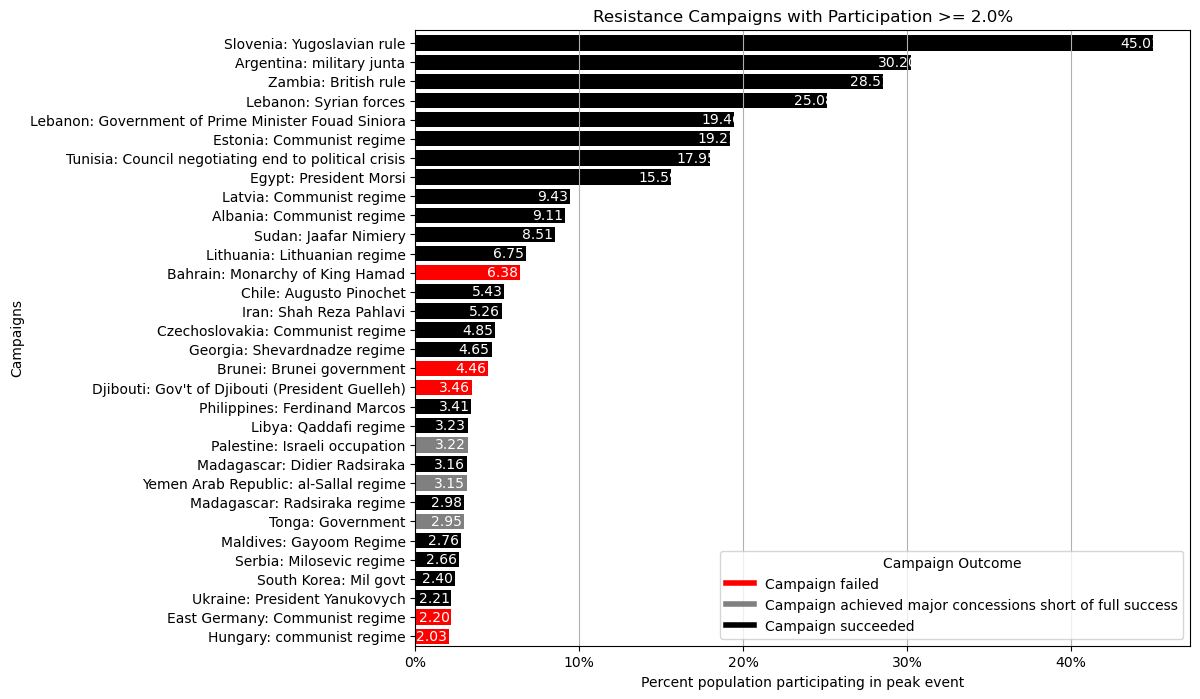

In [13]:
from matplotlib.ticker import PercentFormatter

# Create a horizontal bar plot.
plt.figure(figsize=(10, 8))
bars = plt.barh(filtered_campaigns['LOCATION'] + ': ' + filtered_campaigns['TARGET'], 
               filtered_campaigns['PERCENTAGEPOPULARPARTICIPATION'], color=colors)

# Add labels and title.
plt.ylabel('Campaigns')
plt.xlabel('Percent population participating in peak event')
plt.title('Resistance Campaigns with Participation >= 2.0%')
plt.grid(axis='x')
plt.ylim(-0.5, 31.7)

# Make the x-axis percentage.
plt.gca().xaxis.set_major_formatter(PercentFormatter(1, decimals=0))

# Annotate each bar with the corresponding percentage inside the bar
for bar in bars:
    plt.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height() / 2, f'{bar.get_width() * 100:.2f}', va='center', color='white')

# Add legend
legend_labels = {'Campaign failed': 'red', 'Campaign achieved major concessions short of full success': 'grey', 'Campaign succeeded': 'black'}
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_elements, title='Campaign Outcome', loc='lower right')

plt.show()

* Let's investigate any information about Greece in our DataFrame.

In [14]:
greek_campaigns = campaigns[campaigns['LOCATION'] == 'Greece']
greek_campaigns

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,DECADE
119,401.0,Greek Civil War,Greece,1946.0,1949-01-01,British and US occupation,0.0,0.0,1.0,0.0,...,1778.0,40000.0,0.005092,1.0,0.0,NaN,0.0,1.0,1.0,1940
120,89.0,Greek anti-military,Greece,1973.0,1974-01-01,Military rule,1.0,0.0,0.0,0.0,...,654.0,2500.0,0.000279,1.0,1.0,1.0,0.0,1.0,0.0,1970


* In particular: 

In [15]:
f_campaign = greek_campaigns.iloc[0]
f_campaign 

NAVCOID                                               401.0
CAMPAIGN                                    Greek Civil War
LOCATION                                             Greece
BYEAR                                                1946.0
EYEAR                                   1949-01-01 00:00:00
TARGET                            British and US occupation
SUCCESS                                                 0.0
LIMITED                                                 0.0
FAILURE                                                 1.0
ONGOING                                                 0.0
NONVIOL                                                 0.0
VIOL                                                    1.0
REGCHANGE                                               0.0
FSELFDET                                                1.0
SECESSION                                               0.0
OTHER                                                   0.0
DURATION                                

* As we can observe from the data presented regarding the first recorded Greek campaign, it pertains to the Greek Civil War with the objective of resisting British and US occupation. This campaign was marked by its violent nature and ultimately ended in failure. A very small percentage of the population, approximately 0.005%, participated in the campaign, amounting to 40,000 individuals.

In [16]:
s_campaign = greek_campaigns.iloc[1]
s_campaign 

NAVCOID                                          89.0
CAMPAIGN                          Greek anti-military
LOCATION                                       Greece
BYEAR                                          1973.0
EYEAR                             1974-01-01 00:00:00
TARGET                                  Military rule
SUCCESS                                           1.0
LIMITED                                           0.0
FAILURE                                           0.0
ONGOING                                           0.0
NONVIOL                                           1.0
VIOL                                              0.0
REGCHANGE                                         1.0
FSELFDET                                          0.0
SECESSION                                         0.0
OTHER                                             0.0
DURATION                                        654.0
PARTICIPATION                                  2500.0
PERCENTAGEPOPULARPARTICIPATI

* Subsequently, we observe the campaign of the Polytechnic uprising, a Greek anti-military movement directed against military rule. Although the participation rate was notably low, with just 2,500 participants, the impact of the movement was significant. This is evidenced by the REGCHANGE value, which is equal to 1, indicating a substantial transformation.

## 3. The Effect of Participation on the Probability of Campaign Success

* In this part of the analysis, we will examine the effect of participation on the probability of campaign success, by running a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends.
* Let's import `numpy` to perform logs.

In [17]:
import numpy as np

*  In order to calculate certain values needed for the current question, we will refer to [WCRW Web Appendix](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/YLLHEE/GERY7X&version=1.0).
* From there, the following formulas emerge: 

In [18]:
campaigns.dropna(subset=['PARTICIPATION'], inplace=True)

campaigns['LMEMBERS'] = np.log(campaigns['PARTICIPATION'])
campaigns['POPUL'] = campaigns['PARTICIPATION'] / campaigns['PERCENTAGEPOPULARPARTICIPATION']
campaigns['LNPOP'] = np.log(campaigns['POPUL'])
campaigns['MEMPC'] = campaigns['LMEMBERS'] / campaigns['LNPOP']

* In the code above, we drop all the NaN values indicating that a campaign had 0 participation. It would create errors if we wanted to calculate the log of 0.
* Next, we will set the parametters for the logistic regression and import the `statsmodels` to perform the regression. 

In [19]:
import statsmodels.api as sm

* From the moment that independent variables are the location's logged population and the membership per capita, we set them as the x and the dependent variable success as y. 

In [20]:
X = campaigns[['MEMPC', 'LNPOP']]  
X = sm.add_constant(X)
y = campaigns['SUCCESS']

* Then, we the parameters as input and perform the logistic regression model. 

In [21]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


* Finally, to display the output, we will create a plot showcasing the probability of success based on membership per capita and location's logged population

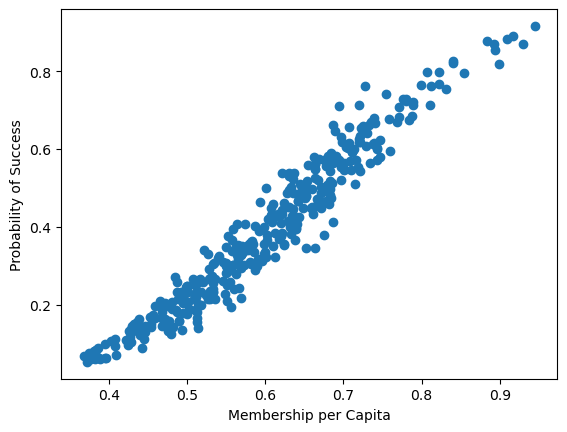

In [22]:
plt.scatter(campaigns['MEMPC'], result.predict(X), alpha=1)
plt.xlabel('Membership per Capita')
plt.ylabel('Probability of Success')
plt.show()

* In this plot, we observe that the data follows a pattern reminiscent of a sigmoid (S). However, there is a lack of coherence, and the points appear quite scattered, which is attributed to the influence of both independent variables on the dependent variable. As we will see below, when the influence is confined solely to the variable membership per capita, our data tends to precisely follow the shape of a sigmoid.

* Now that independent variable is only the membership per capita, we set it as the x and the dependent variable success as y.

In [23]:
X = campaigns[['MEMPC']]
y = campaigns['SUCCESS']

* Set y and x as the parameters of our model. 

In [24]:
model = sm.Logit(y, sm.add_constant(X))
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


* From the results, we will use the coefficient associated with the constant term, the intercept, in the logistic regression model and the corresponding coefficient associated with the variable MEMPC in the logistic regression model.
* This creates a formula as: 
$$ y = \alpha + \beta x$$
* Where:
$$ y = \ln\frac{p(x)}{1 - p(x)} $$
* Solving for $p(x)$, we have: $$ p(x) = \frac {1}{1+e^{-(\alpha + \beta x)}} $$

In [25]:
logit_probs = result.params['const'] + result.params['MEMPC'] * campaigns['MEMPC']
probs = 1 / (1 + np.exp(-logit_probs))
probs

0      0.295117
1      0.298870
2      0.345998
3      0.434322
4      0.804936
         ...   
384    0.884145
385    0.432853
386    0.202945
387    0.139988
388    0.255078
Name: MEMPC, Length: 380, dtype: float64

* Finally, let's create the plot to display the data.

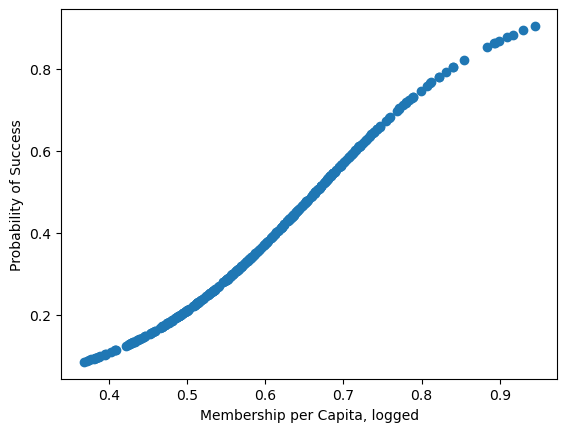

In [26]:
plt.scatter(campaigns['MEMPC'], probs, alpha=1)
plt.xlabel('Membership per Capita, logged')
plt.ylabel('Probability of Success')
plt.show()

* This plot takes the form of a sigmoid (S), and the dots that constitute it are more consolidated than the previous plot because here our independent variable is influenced only by a single independent variable, namely the membership per capita logged.

## 4. The Level of Participation Tipping Point

* As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success. Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.
* As Chenoweth herself states in the summary of her paper, the “3.5% rule” refers to the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event. 
* Obviously, Chenoweth identified certain centers around which the differences in observation values converge and arrived at the following boundaries, as also presented in her paper. 
* Those boundaries we will define as our bins for participation level.

In [27]:
campaigns['PERCENTAGEPOPULARPARTICIPATION'] *= 100
bins = [0, 0.0035, 0.015, 0.06, 0.25, 1.0, 3.5, np.inf]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

* Let's focus on creating a table like the one in her paper. 

In [28]:
new_campaigns = campaigns.copy()
new_campaigns['PARTLVL'] = pd.cut(new_campaigns['PERCENTAGEPOPULARPARTICIPATION'], bins=bins, labels=labels, right=False)
table = new_campaigns.groupby('PARTLVL').agg({
    'SUCCESS': ['count', 'mean']
}).reset_index()
table

PARTLVL SUCCESS          
                       count      mean
0  less than 0.0035%      24  0.041667
1   0.0035% - 0.015%      44  0.090909
2     0.015% - 0.06%      66  0.242424
3      0.06% - 0.25%      95  0.452632
4       0.25% - 1.0%      92  0.456522
5        1.0% - 3.5%      41  0.609756
6  greater than 3.5%      18  0.888889

* And finally, some key changes to present our table, by setting the appropriate column names and rounding the Success rates.

In [29]:
table.columns = ['Peak Popular Participation (%)', 'Observations', 'Success Rate']
table['Success Rate'] *= 100
table['Success Rate'] = table['Success Rate'].round(2)
table

,Peak Popular Participation (%),Observations,Success Rate
0,less than 0.0035%,24,4.17
1,0.0035% - 0.015%,44,9.09
2,0.015% - 0.06%,66,24.24
3,0.06% - 0.25%,95,45.26
4,0.25% - 1.0%,92,45.65
5,1.0% - 3.5%,41,60.98
6,greater than 3.5%,18,88.89


* Now, let's try to find the percentage of the population that is the tipping point for success in a campaign with 99% probability.
* We will use the second model of the previous analysis, which means the one with 1 independent variable. 

In [30]:
X = campaigns['PERCENTAGEPOPULARPARTICIPATION']  
X = sm.add_constant(X)
y = campaigns['SUCCESS']

model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.614082
         Iterations 8


* Let's take from the result of the model the coefficiency of the 'const' parameter and of the 'PERCENTAGEPOPULARPARTICIPATION'.

In [31]:
const_coefficient = result.params['const']
const_coefficient

-0.8075585735147176

In [32]:
participation_coefficient = result.params['PERCENTAGEPOPULARPARTICIPATION']
participation_coefficient

0.5595241266623587

* Now, we'll set the desired probability of 99%.

In [33]:
desired_probability = 0.99

* Calculate the logit value corresponding to the desired probability.
* Following this formula: $$ y = \ln\frac{p(x)}{1 - p(x)} $$

In [34]:
logit_value = np.log(desired_probability / (1 - desired_probability))

* Finally, we calculate the PERCENTAGEPOPULARPARTICIPATION value corresponding to the logit value.

In [35]:
tipping_point_participation = (logit_value - const_coefficient) / participation_coefficient
tipping_point_participation

9.655845326772688

* Thus, ultimately, we observe that the percentage of participation is equal to 9.65%, which is higher than Chenoweth's threshold of 3.5%. This constitutes the tipping point that will lead us to a probability of success of 99%.

## 5. Nonviolent Resistance and Target Regime Type

* In this part of the analysis, we will examine whether nonviolent resistance remains significant even if we control for the regime type by running a logistic regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.
* First, let's download the data from the p5v2018 file, extracting information about the regime types of the campaigns. 

In [36]:
p5v = pd.read_excel('data/p5v2018.xls')
p5v

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,...,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17569,1,5522014,552,ZIM,Zimbabwe,2014,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17570,1,5522015,552,ZIM,Zimbabwe,2015,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17571,1,5522016,552,ZIM,Zimbabwe,2016,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17572,1,5522017,552,ZIM,Zimbabwe,2017,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* From this DataFrame, we need the polity and polity2 columns, as well as the year and the country.

In [37]:
p5v = p5v[['country', 'year', 'polity2']]
p5v

,country,year,polity2
0,Afghanistan,1800,-6.0
1,Afghanistan,1801,-6.0
2,Afghanistan,1802,-6.0
3,Afghanistan,1803,-6.0
4,Afghanistan,1804,-6.0
...,...,...,...
17569,Zimbabwe,2014,4.0
17570,Zimbabwe,2015,4.0
17571,Zimbabwe,2016,4.0
17572,Zimbabwe,2017,4.0


* From the campaigns we will only need the participation column('PARTICIPATION'), the logg of the population('LNPOP') and finally the location and the end year of the campaign('LOCATION' and 'EYEAR' correspondingly). 

In [38]:
campaigns = campaigns[['LOCATION', 'EYEAR', 'LNPOP', 'PARTICIPATION', 'SUCCESS', 'NONVIOL']]
campaigns['EYEAR'] = (pd.to_datetime(campaigns['EYEAR'], format='%Y')).dt.year
campaigns

,LOCATION,EYEAR,LNPOP,PARTICIPATION,SUCCESS,NONVIOL
0,Afghanistan,1979,16.562781,10000.0,1.0,0.0
1,Afghanistan,1989,16.496532,10000.0,1.0,0.0
2,Afghanistan,1996,16.924572,20000.0,1.0,0.0
3,Afghanistan,2014,17.424293,60000.0,0.0,0.0
4,Albania,1991,15.007682,300000.0,1.0,1.0
...,...,...,...,...,...,...
384,Zambia,1963,15.070557,1000000.0,1.0,1.0
385,Zambia,1991,15.924478,23000.0,1.0,1.0
386,Zambia,2001,16.197288,3000.0,1.0,1.0
387,Zimbabwe,1979,15.745165,1000.0,0.0,0.0


* We will log the participation as asked and rename the column to 'LNPART'.

In [39]:
campaigns.rename(columns={'PARTICIPATION': 'LNPART'}, inplace=True)
campaigns['LNPART'] = np.log(campaigns['LNPART'])
campaigns

,LOCATION,EYEAR,LNPOP,LNPART,SUCCESS,NONVIOL
0,Afghanistan,1979,16.562781,9.210340,1.0,0.0
1,Afghanistan,1989,16.496532,9.210340,1.0,0.0
2,Afghanistan,1996,16.924572,9.903488,1.0,0.0
3,Afghanistan,2014,17.424293,11.002100,0.0,0.0
4,Albania,1991,15.007682,12.611538,1.0,1.0
...,...,...,...,...,...,...
384,Zambia,1963,15.070557,13.815511,1.0,1.0
385,Zambia,1991,15.924478,10.043249,1.0,1.0
386,Zambia,2001,16.197288,8.006368,1.0,1.0
387,Zimbabwe,1979,15.745165,6.907755,0.0,0.0


* Now, we will create a new merged DataFrame based on the 'LOCATION' and 'EYEAR' columns.

In [40]:
merge = pd.merge(campaigns, p5v, left_on=['LOCATION', 'EYEAR'], right_on=['country', 'year'], how='left')
merge.drop(['country', 'year'], axis=1, inplace=True)
merge

,LOCATION,EYEAR,LNPOP,LNPART,SUCCESS,NONVIOL,polity2
0,Afghanistan,1979,16.562781,9.210340,1.0,0.0,NaN
1,Afghanistan,1989,16.496532,9.210340,1.0,0.0,-8.0
2,Afghanistan,1996,16.924572,9.903488,1.0,0.0,-7.0
3,Afghanistan,2014,17.424293,11.002100,0.0,0.0,-1.0
4,Albania,1991,15.007682,12.611538,1.0,1.0,3.0
...,...,...,...,...,...,...,...
375,Zambia,1963,15.070557,13.815511,1.0,1.0,NaN
376,Zambia,1991,15.924478,10.043249,1.0,1.0,6.0
377,Zambia,2001,16.197288,8.006368,1.0,1.0,5.0
378,Zimbabwe,1979,15.745165,6.907755,0.0,0.0,NaN


* We will investigate the NaN values of polity2. 

In [41]:
nan_sum = merge['polity2'].isna().sum()
nan_sum

83

* 83 out of the 380 campaigns don't have a polity2 number which is close to 20% of the total campaigns. The discrepancy arises due to a mismatch between the names of the countries in the p5v file, compared to the ones in the file containing information about the campaigns.
* We will assume that these data will not significantly impact the subsequent findings, without compromising the generality.

In [42]:
merge = merge.dropna(subset='polity2')
merge

,LOCATION,EYEAR,LNPOP,LNPART,SUCCESS,NONVIOL,polity2
1,Afghanistan,1989,16.496532,9.210340,1.0,0.0,-8.0
2,Afghanistan,1996,16.924572,9.903488,1.0,0.0,-7.0
3,Afghanistan,2014,17.424293,11.002100,0.0,0.0,-1.0
4,Albania,1991,15.007682,12.611538,1.0,1.0,3.0
5,Algeria,1962,16.213406,10.571317,1.0,0.0,-8.0
...,...,...,...,...,...,...,...
370,Yugoslavia,1998,16.176365,9.210340,0.0,1.0,-6.0
371,Yugoslavia,1992,16.166886,9.433484,1.0,0.0,-5.0
376,Zambia,1991,15.924478,10.043249,1.0,1.0,6.0
377,Zambia,2001,16.197288,8.006368,1.0,1.0,5.0


* Now, let's continue by running a logistic  regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.
* Independent variables are, as mentioned above the Polity V score of campaign target('polity2'), the log of participation('LNPART'), and the location’s logged population the year the campaign ends(LNPOP).

In [43]:
X = merge[['NONVIOL', 'LNPART', 'LNPOP', 'polity2']]
X = sm.add_constant(X)
y = merge['SUCCESS']

model = sm.Logit(y, X)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.536938
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.2025
Time:                        23:37:07   Log-Likelihood:                -159.47
converged:                       True   LL-Null:                       -199.97
Covariance Type:            nonrobust   LLR p-value:                 1.075e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8727      1.498      1.250      0.211      -1.063       4.809
NONVIOL        0.8662      0.295      2.936      0.003       0.288       1.445
LNPART         0.4367      0.090      4.849      0.000       0.260       0.613
LNPOP         -0.4270      0.099     -4.321      0.000      -0.621      -0.233
polity2        0.0522      0.025      2.057      0.040       0.002       0.102
==============================================================================
"""

* The p-value associated with 'NONVIOL' is 0.003, which falls below the conventional significance threshold of 0.05. This low p-value suggests that the observed relationship between 'NONVIOL' and the odds of success is statistically significant. In practical terms, this implies that the association we observe is likely not due to random chance, reinforcing the importance of the 'NONVIOL' variable as a predictor of campaign success in the model.
* Also, the coefficient for 'NONVIOL' is 0.8662 which means that the variable 'NONVIOL' has a very high impact on the success of the campaign.

### Summary 

* In summary, our analysis suggests that non-violent revolutions tend to yield more favorable outcomes than violent ones. Nevertheless, it is essential to underscore another significant finding, particularly concerning the participation percentage. By measuring it through metrics such as the popular participation percentage and other variables like membership per capita, we have observed a positive correlation. Specifically, higher levels of public engagement in advocating for collective rights are associated with increased probabilities of success and the realization of those rights.